# JNB Lab Solutions

In [5]:
# import libraries
# Always run this cell first!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import powerlaw
from scipy import integrate
from scipy.integrate import odeint
import math
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation
import scipy
import statsmodels.api # appear to need to import the api as well as the library itself for the interpreter to find the modules
import statsmodels as sm
from matplotlib import ticker
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline
plotly.offline.init_notebook_mode(connected=True) # make plotly work with Jupyter Notebook using CDN
from scipy.stats import linregress
import folium
from folium.plugins import MarkerCluster

# an extra function for plotting a straight line
def plot_abline(slope, intercept, color = None, x_name = "x", y_name = "y"):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(
        x_vals, y_vals, '--', color = color,
        label = f"${y_name} = {slope:.2f}{x_name} " + ("-" if intercept < 0 else "+") + f"{abs(intercept):.2f}$"
    )

## Fundamental Concepts

### Bifurcations

Solution to Problem 1

In [2]:
def rmpp(x0,y0,K):
    from scipy.integrate import odeint
    import matplotlib.pyplot as plt
    import numpy as npy
    import random

    # timestep determines the accuracy of the euler method of integration
    timestep = 0.001
    # amplitude of noise term
    amp = 0.
    # the time at which the simulation ends
    end_time = 500

    # creates a time vector from 0 to end_time, seperated by a timestep
    t = npy.arange(0,end_time,timestep)

    # intialize rabbits (x) and foxes (y) vectors
    x = []
    y = []

    """" parameters"""

    r = .5
    a=5
    h=3
    e=.5
    m=.1

    """ euler integration """

    # initial conditions for the rabbit (x) and fox (y) populations at time=0
    x0=x0
    y0=y0
    x.append(x0)
    y.append(y0) 

    # forward euler method of integration
    # a perturbbation term is added to the differentials to make the simulation stochastic
    for index in range(1,len(t)):

        # evaluate the current differentials
        xd = r*x[index-1]*(1-x[index-1]/K) - a * x[index-1]*y[index-1]/(1+a*h*x[index-1])
        yd = e*a*x[index-1]*y[index-1]/(1+a*h*x[index-1])-m*y[index-1]

        # evaluate the next value of x and y using differentials
        next_x = x[index-1] + xd * timestep
        next_y = y[index-1] + yd * timestep

        x.append(next_x)
        y.append(next_y)

    """ visualization """

    if amp == 0:    
        # visualization of deterministic populations against time
        plt.figure(figsize=(2,1))
        plt.plot(x, y)
        plt.xlim=[0,.25]
        plt.ylim=[0,.25]
        plt.ylabel('Predator Density')
        plt.xlabel('Prey Density')
        plt.text(x0,y0,'o',ha='center', va='center',color='r')
        plt.text(x0,y0,' Initial Point',ha='left', va='center',color='r')
        plt.title('Predator-Prey K='+str(K))
        plt.savefig("K.png")
        plt.show()
    return

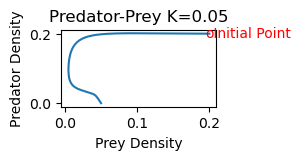

In [3]:
# Probkem 1b
rmpp(.2,.2,.05)

Solution to Problem 2a)

<img src="fig11.png" alt="Drawing" style="width: 500px;"/>

2b) As K increases, the equilibrium point shifts stability from one with zero predator concentration to one with positive predator concentration. Increasing K further, the equilibrium is still stable, but the solution spirals around the equilibrium point on its approach toward the equilibrium values. The steady state is hence also referred to as a stable spiral. Finally, as K increases still further,the equilirium loses its stability and solutions approach a stable limit cycle (periodic solution) surrounding the equilibrium point.

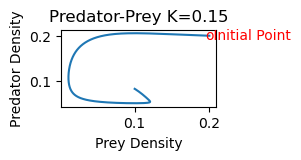

In [4]:
rmpp(.2,.2,.15)

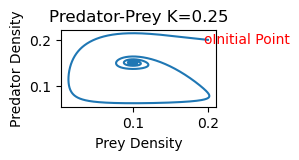

In [5]:
rmpp(.2,.2,.25)

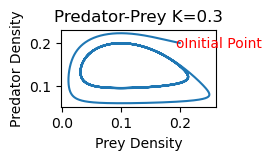

In [6]:
rmpp(.2,.2,.3)

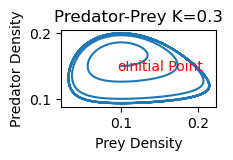

In [7]:
rmpp(.1,.15,.3)

Solution to Problem 3 

The transition of the steady state with positive densities of both prey and predator from stable to unstable occurs in what is called a Hopf bifurcation point. As explained in the previous section at larger values of K the prey-predator equilibrium loses its stability while at the same time a limit cycle emerges, that is a closed loop of prey and predator densities which all timeseries of dynamics of the model tend to approach.For more information on this: https://staff.fnwi.uva.nl/a.m.deroos/projects/QuantitativeBiology/43-HopfPoint-Rosenzweig.html

### Sensitive Dependence on Initial Conditions 


Solution to problem 1

The FHN bursting behavior is related to Hopf bifurcation in the 2D system. The interval quiescense (burst pattern 00000) occurs at a subcritical parameter values where the equilibrium is a stable spiral. The two large spikes(11) occur for parameter values across the Hopf bifurcation point due to a stable periodic solution in the underlying 2D system


 

Solution to Problem 2

a) After plugging in  x0=[1.725,.337,.00764] for the initial condition,  the burst pattern changes to 11000101000000



b) Sensitive dependence occurs in non-linear systems where the initial conditions have a large impact on the solution behavior. For the the FHN system, changing the initial condition only slightly $[1.744,.298,.00872]\rightarrow [1.725,.337,.00764]$ results in a completely different stable burst pattern.

### Heavy-tail Random Walks

Solution to problem 1

a)

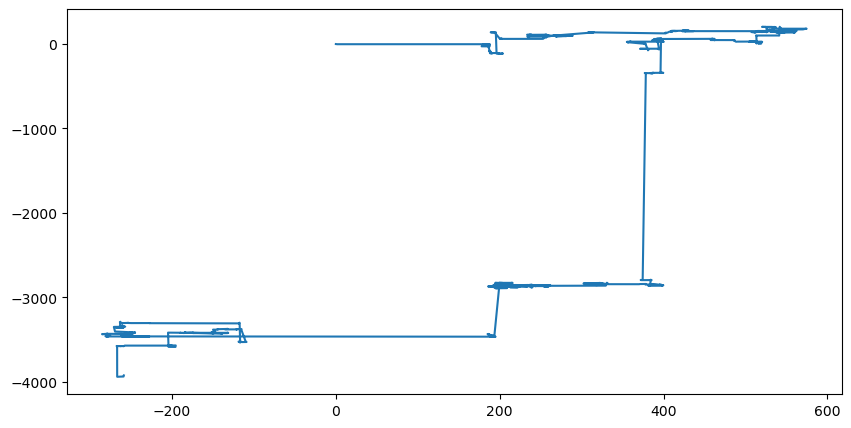

In [8]:
# Set seed for reproducible results (optional)
np.random.seed(10)

# Initial particle position
current_xpos = 0
current_ypos = 0

# Initial list of positions
x = [current_xpos]
y = [current_ypos]

# Define number of particle steps
N = 1000

# Generate set of random steps in advance (it could also be done inside the for loop

xstep=np.random.standard_cauchy(N)
ystep=np.random.standard_cauchy(N)

# Iterate and track the particle over each step
for i in range(N):
    
    # Update position
    current_xpos += xstep[i]
    current_ypos += ystep[i]
    
    # Append new position
    x.append(current_xpos)
    y.append(current_ypos)
    
# Plot random walk
plt.figure(figsize=(10,5))
plt.plot(x, y)

plt.show()    

b) Unlike Brownian motion, a Cauchy distribution has long "flights."

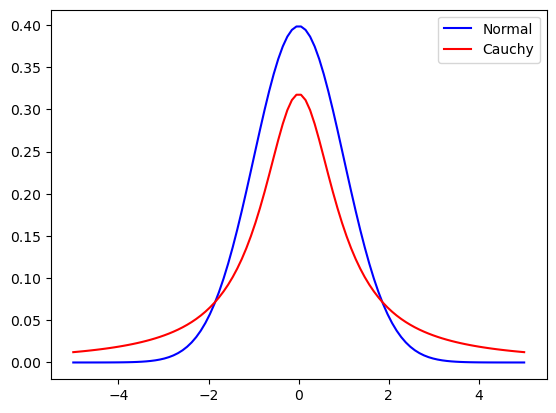

In [9]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma),color='b')
plt.plot(x, stats.cauchy.pdf(x, mu, sigma),color='red')
plt.legend(["Normal","Cauchy"])
plt.show()

2. a) Unlike a normal distribution with standard deviation s.d.=1, the Cauchy distribution (in red) wih a heavy tail has a significant probability for random draws more than 3 or less than -3. That is what causes the long flights in 1a).

b) In some contexts, long flights are catastrophic events (eg. stock market crash).

## Scale Adjusted Metropolitan Index

Solution to Exercise

Text(0.5, 1.0, 'SAMI with Hong Kong')

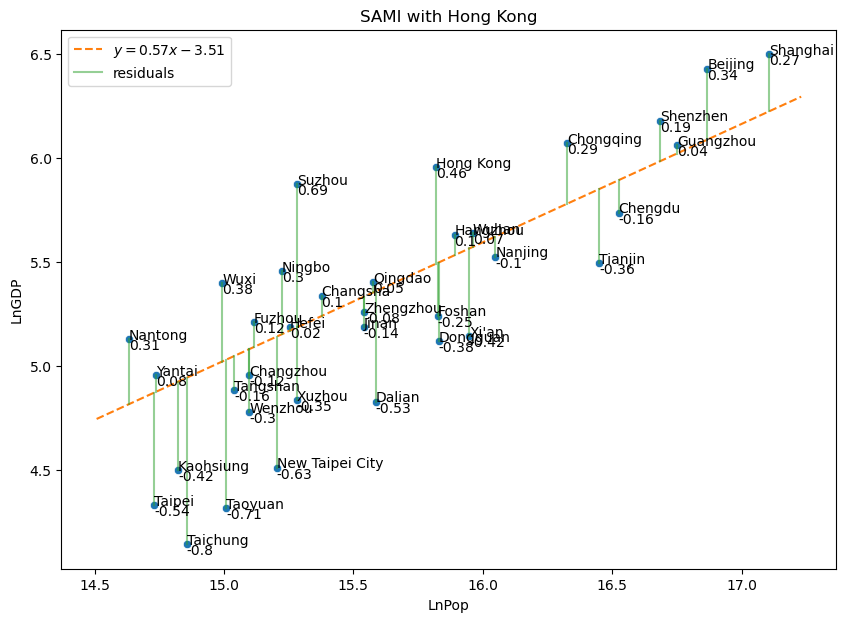

In [10]:
chinagdp = pd.read_excel('ChinaGDPwHongKong.xlsx')
for i in chinagdp.index:
    chinagdp.loc[i,"LnPop"]=np.log( chinagdp.loc[i,"Pop"])
    chinagdp.loc[i,"LnGDP"]=np.log( chinagdp.loc[i,"GDP"])
fig, axes = plt.subplots(1,1, sharex = True, sharey = True, figsize = (10,7))
slopes = [.5689]
intercepts = [-3.5082]
(scattercolor, trendcolor, residcolor) = sns.color_palette()[0:3]
# plot data
sns.scatterplot(
    data = chinagdp,
    x = 'LnPop',
    y = 'LnGDP',
    color = scattercolor,
    )
# plot the line with given slope and intercept
plot_abline(slopes[0], intercepts[0], color = trendcolor)
# plot residuals
for j, (x, y) in enumerate(zip(chinagdp['LnPop'], chinagdp['LnGDP'])):
    plt.plot(
        [x, x], [y, slopes[0]*x + intercepts[0]],
        color = residcolor, alpha = 0.5,
        label = "residuals" if j == 0 else "" # show legend entry only for first residual in each plot
    )
for j, (x, y) in enumerate(zip(chinagdp['LnPop'], chinagdp['LnGDP'])):
    plt.text(x,y,chinagdp.loc[j,"City"])
    plt.text(x,y-.05,str(np.round(y-(slopes[0]*x + intercepts[0]),2)))
plt.legend(loc = "upper left")
plt.savefig("ChinaSAMI.png")
plt.gca().set_title("SAMI with Hong Kong")

## IDP

we will compute the deficiency entropy

$$
H_{deficiency}= - \sum_{p_i\neq0} i p_i \ln p_i. 
$$

to assess the IDP camp education in Mekelle and Shire.

1. Read in IDP data from the file "idp.xlsx"

In [7]:
#original filename = 'dtm-ethiopia-tigray-region-site-assessment-round-33-april-june-2023.xlsx'
filename="IDP.xlsx"
df = pd.read_excel(filename)
df.head(1)

,1.1.a.1: Survey Date,Country,Country Code,Reported Date,1.1.a.2: Survey Round,1.1.c.1: Site ID,1.1.d.1: Site Name,1.1.d.2: Site Alternate Name,1.4.a.2: Is site open?,1.1.e.1: Region,...,S1723: Other internet sources (e.g. apps),S1723: Please specify which other internet sources,S1723: Other,"S1723: If other source of news/information, please specify",S1784: Is mobile network access available in the site?,S1495: What % of HHs own a mobile phone?,11.3.a.1: Are members of the community discussing/advertising travel opportunities?,"11.3.a.6: If Yes, to where?",11.3.a.2: Specify all locations,M1712: Additional Comments / Observations
0,#date+occurred,#country+name,#country+code,#date+reported,NaN,NaN,NaN,NaN,NaN,#adm1+name,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2. Select columns to assess education disorder.

In [8]:
#Pre-primary, secondary, resources,
#quality/satisfaction, girl attendance, boy attendance, teachers
columns_to_keep = ['1.1.c.1: Site ID',
                   '1.1.d.1: Site Name',
                   '1.1.f.1: GPS: Longitude',
                   '1.1.f.2: GPS: Latitude',
                   'S1518: Is there access to pre-primary (formal or temporary) schools for children from displaced HHs?',
                   'S1527: Is there access to primary (formal or temporary) schools for children from displaced HHs?',
                   'S1536: Access to secondary (formal or temporary) schools for children from displaced HHs?',
                   'S1226: Other, Specify',
                   'S1613: Poor educational standard',
                   'S1613: Why are some girls not attending school?',
                   'S1614: Why are some boys not attending school?',
                   'Are there enough teachers to school children?']
data = df[columns_to_keep]
new_column_names = ['ID', 'Name','Long','Lat','Pre-primary','Primary','Secondary','Resources','Quality','Girl_Attendence','Boy_Attendence','Teachers']
data.columns = new_column_names
data=data.dropna()
data.head(1)

,ID,Name,Long,Lat,Pre-primary,Primary,Secondary,Resources,Quality,Girl_Attendence,Boy_Attendence,Teachers
1,TG1039,Hareze Seb'ata,39.5828,14.43946,No,No,No,Education is not yet started,No,Other,Other,Unknown


3. Map IDP camps (optional)

In [9]:

# Assuming 'data' is your DataFrame with 'Lat' and 'Long' columns

# Create a folium map centered around the mean of latitudes and longitudes
map_center = [data['Lat'].mean(), data['Long'].mean()]
my_map = folium.Map(location=map_center, zoom_start=12)

# Create a MarkerCluster layer for better visualization of markers
marker_cluster = MarkerCluster().add_to(my_map)

# Add markers for each row in the DataFrame
for index, row in data.iterrows():
    folium.Marker([row['Lat'], row['Long']], popup=row['Name']).add_to(marker_cluster)

# Save the map as an HTML file or display it
my_map.save("my_map.html")
# or
my_map


4. Determine camps near Mekelle and Shire.

In [10]:
#Mekele = 13.4963° N, 39.4743°
#Shire = 14.1016° N, 38.2836° 
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the Haversine distance between two sets of latitude and longitude coordinates.
    """
    R = 3959.87433  # radius of the Earth in miles
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2)**2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

# Assuming 'data' is your DataFrame with 'Lat' and 'Long' columns
Mekele_coords = (13.4963, 39.4743)  # Replace with the coordinates of the first city
Shire_coords = (14.1016, 38.2836)  # Replace with the coordinates of the second city

# Function to determine the closest city based on Haversine distance
def closest_city(row):
    distance_to_Mekele = haversine(row['Lat'], row['Long'], *Mekele_coords)
    distance_to_Shire = haversine(row['Lat'], row['Long'], *Shire_coords)
    
    if distance_to_Mekele < 15 and distance_to_Mekele <= distance_to_Shire:
        return 'Mekele'
    elif distance_to_Shire < 15:
        return 'Shire'
    else:
        return 'Other'

# Add 'City' column to the DataFrame
data['City'] = data.apply(closest_city, axis=1)
data.head(1)

,ID,Name,Long,Lat,Pre-primary,Primary,Secondary,Resources,Quality,Girl_Attendence,Boy_Attendence,Teachers,City
1,TG1039,Hareze Seb'ata,39.5828,14.43946,No,No,No,Education is not yet started,No,Other,Other,Unknown,Other


5. Binary code education needs

In [11]:
#Pre-primary: 'Yes' = 1, else 0
#Primary: 'Yes'=1, else 0
#Secondary: 'Yes' = 1, else 0
#Resources: 'Lack of scholastic material'=0, else 1
#Quality: 'Yes' = 1, else 0
#Girl_Attendence: 'They are attending' = 1, else = 0
#Boy_Attendence: 'They are attending' = 1, else = 0
#Teachers: 'Yes' = 1, else = 0

# Assuming 'data' is your DataFrame with qualitative columns

# Define mapping functions for each column
def map_pre_primary(value):
    return 1 if 'Yes' in value else 0

def map_primary(value):
    return 1 if 'Yes' in value else 0

def map_secondary(value):
    return 1 if 'Yes' in value else 0

def map_resources(value):
    return 0 if 'Lack of scholastic material' in value else 1

def map_quality(value):
    return 1 if 'Yes' in value else 0

def map_girl_attendance(value):
    return 1 if 'They are attending' in value else 0

def map_boy_attendance(value):
    return 1 if 'They are attending' in value else 0

def map_teachers(value):
    return 1 if 'Yes' in value else 0

# Apply the mapping functions to each column
data['Pre-primary'] = data['Pre-primary'].apply(map_pre_primary)
data['Primary'] = data['Primary'].apply(map_primary)
data['Secondary'] = data['Secondary'].apply(map_secondary)
data['Resources'] = data['Resources'].apply(map_resources)
data['Quality'] = data['Quality'].apply(map_quality)
data['Girl_Attendence'] = data['Girl_Attendence'].apply(map_girl_attendance)
data['Boy_Attendence'] = data['Boy_Attendence'].apply(map_boy_attendance)
data['Teachers'] = data['Teachers'].apply(map_teachers)

# Display the updated DataFrame
data.head()



,ID,Name,Long,Lat,Pre-primary,Primary,Secondary,Resources,Quality,Girl_Attendence,Boy_Attendence,Teachers,City
1,TG1039,Hareze Seb'ata,39.58280,14.43946,0,0,0,1,0,0,0,0,Other
2,TG1040,Enda Mosa,39.55493,14.42384,0,1,0,1,0,0,0,0,Other
3,TG729,Adi Abagie,38.18660,14.26590,0,0,0,1,0,0,0,0,Shire
4,TG732,May Ambssa,38.23350,14.22740,0,0,0,1,0,0,0,0,Shire
5,TG731,Hibret,38.16930,14.32020,0,0,0,1,0,0,0,0,Other


6) Find the total number of education needs in each camp.

In [12]:
for i in data.index:
    data.loc[i,"sum"]=int(data.loc[i,'Pre-primary']+data.loc[i,'Primary']+data.loc[i,'Secondary']+data.loc[i,'Resources']+data.loc[i,'Quality']+data.loc[i,'Girl_Attendence']+data.loc[i,'Boy_Attendence']+data.loc[i,'Teachers'])

7) Separate data for Mekelle and for Shire.

In [13]:
# Filter rows with 'Mekele' in the 'City' column
mekele_df = data[data['City'] == 'Mekele']

# Filter rows with 'Shire' in the 'City' column
shire_df = data[data['City'] == 'Shire']

In [14]:
mekele_df.head(2)

,ID,Name,Long,Lat,Pre-primary,Primary,Secondary,Resources,Quality,Girl_Attendence,Boy_Attendence,Teachers,City,sum
468,TG624,Felege Mayat,39.4715,13.6018,1,1,0,0,0,1,1,0,Mekele,4.0
469,TG765,Amanit,39.2707,13.5746,1,1,0,0,0,0,1,0,Mekele,3.0


In [15]:
shire_df.head(2)

,ID,Name,Long,Lat,Pre-primary,Primary,Secondary,Resources,Quality,Girl_Attendence,Boy_Attendence,Teachers,City,sum
3,TG729,Adi Abagie,38.1866,14.2659,0,0,0,1,0,0,0,0,Shire,1.0
4,TG732,May Ambssa,38.2335,14.2274,0,0,0,1,0,0,0,0,Shire,1.0


8) Compute entropy for IDP education data for Mekelle and Shire

In [16]:
import pandas as pd
import numpy as np

def H(df,numcamps):
    n0=0
    n1=0
    n2=0
    n3=0
    n4=0
    n5=0
    n6=0
    n7=0
    n8=0
    for i in df.index:
        if df.loc[i,"sum"]==0:
            n0=n0+1
        if df.loc[i,"sum"]==1:
            n1=n1+1
        if df.loc[i,"sum"]==2:
            n2=n2+1
        if df.loc[i,"sum"]==3:
            n3=n3+1
        if df.loc[i,"sum"]==4:
            n4=n4+1
        if df.loc[i,"sum"]==5:
            n5=n5+1
        if df.loc[i,"sum"]==6:
            n6=n6+1
        if df.loc[i,"sum"]==7:
            n7=n7+1
        if df.loc[i,"sum"]==8:
            n8=n8+1
    entropy=0
    if n1>0:
        entropy=entropy-(n1/numcamps)*np.log(n1/numcamps)
    if n2>0:
        entropy=entropy-2*(n2/numcamps)*np.log(n2/numcamps)  
    if n3>0:
        entropy=entropy-3*(n3/numcamps)*np.log(n3/numcamps)
    if n4>0:
        entropy=entropy-4*(n4/numcamps)*np.log(n4/numcamps)
    if n5>0:
        entropy=entropy-5*(n5/numcamps)*np.log(n5/numcamps)
    if n6>0:
        entropy=entropy-6*(n6/numcamps)*np.log(n6/numcamps)
    if n7>0:
        entropy=entropy-7*(n7/numcamps)*np.log(n7/numcamps)
    if n8>0:
        entropy=entropy-8*(n8/numcamps)*np.log(n8/numcamps)
    hist=[n0,n1,n2,n3,n4,n5,n6,n7,n8]
    return entropy,hist
        

In [17]:
[mekent,mekhist]=H(mekele_df,48)
mekent

2.7258679080823205

In [18]:
[shient,shihist]=H(shire_df,34)
shient

1.2077866910040451

9) Make a histogram of the number of education needs (0 to 8) for IDP camps in Mekelle and in Shire. 

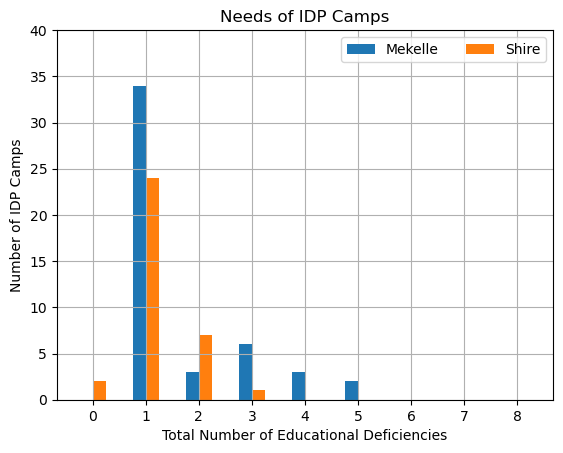

In [19]:
import matplotlib.pyplot as plt
count=('0','1','2','3','4','5','6','7','8')
frequency = {
    'Mekelle': mekhist,
    'Shire': shihist,
}
x = np.arange(len(count))  # the label locations
width=.25
multiplier=0

for attribute, measurement in frequency.items():
    offset = .125+width * multiplier
    rects = plt.gca().bar(x + offset, measurement, width, label=attribute)
    #plt.gca().bar_label(rects, padding=3)
    multiplier += 1
    
# Add some text for labels, title and custom x-axis tick labels, etc.
plt.gca().set_xlabel('Total Number of Educational Deficiencies')
plt.gca().set_ylabel('Number of IDP Camps')
plt.gca().set_title('Needs of IDP Camps')
plt.gca().set_xticks(x + width, count)
plt.gca().legend(loc='upper right', ncols=3)
plt.gca().set_ylim(0, 40)
plt.grid()
plt.savefig("needs.png")
plt.show()

Our analysis gave an entropy of  2.72 for the $N_1=48$ camps in Mekelle and 
1.21 for the $N_2=34$ camps in Shire. The higher $H_{deficiency}$ value for Mekelle appears consistent with the fact that Mekelle (unlike Shire) had a few camps with 4 or 5 education needs, and also considerable more camps with 3 education needs.

## References


Bertin, E. 2021. <i>Statistical Physics of Complex Systems: A Concise Introduction (3rd Edition)</i>. Cham, Switzerland: Springer Nature.

Bettencourt, L. 2022. <i>Introduction to Urban Science: Evidence and Theory of Cities as Complex Systems.</i> Cambridge, MA: The MIT Press.

Fieguth, P. 2021.<i>An Introduction to Complex Systems: Society, Ecology, and Nonlinear Dynamics (2nd Edition)</i>. Cham, Switzerland: Springer Nature.




Ghosh, A. 2017.  <i>Dynamic Systems for Everyone: Understanding how our world works. (2E)</i>  Cham, Switzerland: Springer.

Isihara P, Diedrichs DR, Kartawijaya T, Townsend E, and Tully K. 2017. Disaster Relief Modeling, The UMAP Journal, Vol. 38(4):399-430.  

Macauley, T.   2017. RIoT Control Understanding and Managing Risks and the Internet of Things. Amsterdam: Elsevier.

Martin, B. and de Roos, A. 2023. Hopf bifurcation in a predator-prey model. https://staff.fnwi.uva.nl/a.m.deroos/projects/QuantitativeBiology/43-HopfPoint-Rosenzweig.html

Murray, J.D. 2002. <i>Mathematical Biology: I. An Introduction (3E).</i> New York: Springer.

Sampson, R. 2012. <i>Great American City: Chicago and the Enduring Neighborhood Effect.</i> Chicago: The University of Chicago Press. 



Siegenfeld, A. and Bar-Yam, Y. 2020. An introduction to complex system science and its applications. https://www.hindawi.com/journals/complexity/2020/6105872/

Tranquillo, J. 2019. An Introduction to Complex Systems: Making Sense of a Changing World. Cham, Switzerland: Springer Nature.


## Acknowledgement


The project team is grateful to Paul Campbell for his encouragement to write a chapter on this topic, and to Mayor Kidanemariam and Ms. Karin van den Bosch for their help understanding the IDP situation in Nebelet and in Shire.

